1. Mount Drive
The commands below will promote an action to give permission to mount you drive through any of your affiliated Google accounts. `ACCEPT` them.

2. After that, you will have mounted but still not in your actual cloud drive yet. ou are in still in colab storage vm.

3. if you `ls` you will see that there are `MyDrive` (your actual drive) and other dir.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Get you to your actul drive cd `MyDrive`. write `pwd` it will show `content/drive/MyDrive`
2. From here you can create a diffrent directory if you want to
3.`git clone`, `cd` into your clone dir.
4. Move your existing file into this directory that is now in your dirve. You can use the following commands
Example: !cp "/content/drive/MyDrive/Colab Notebooks/Untitled.ipynb" "/content/drive/MyDrive/Folder_name/Untitled.ipynb"

Note: You can use `mv` to move the file instead of copying it
Untitled.ipynb can be renamed to anything


Now that your work is set up in your Drive, you can open a new Colab session directly from your `Folder_name` directory. There are two primary ways to do this, both of which avoid creating a temporary "Welcome" file.

## Method 1: Using the Google Drive UI

This is the most common and straightforward method.

1.  **Open Google Drive** in your web browser.
2.  **Navigate to your `Folder_name` folder**.
3.  **Double-click** on the `.ipynb` notebook file you want to open. It will automatically launch in Colab.

This method directly opens the existing notebook file, ensuring you're working on the correct, persistent version.

***

## Method 2: Creating a New Notebook in the Correct Location

If you need to start a brand new notebook for a project within the `folder_name` directory, you can create it directly from your Google Drive.

1.  **Open Google Drive** and navigate to the `folder_name` folder.
2.  **Right-click** in an empty space within the folder.
3.  Go to **More > Google Colaboratory**.

This creates a new, blank Colab notebook file directly inside your directory.
You will then need to start your session by mounting your Drive and changing the working directory to your `folder_name` folder using `cd /content/drive/MyDrive/folder_name`.

This ensures any new files you create or clone are saved to the correct location.

In [4]:
import torch
import numpy as np
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
from torch import nn
import matplotlib.pyplot as plt

We now set the device. Here we want to leverage colabs `cuda gpu` that is more capable. I mean why not

We then print the device to ensure it is what we want `cuda`

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [8]:
# 1. Setup data
weight = 0.7
bias = 0.3
start = 0.0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1) #the unsqueezehelps manipulate the dimensions without altering the values of data
y = weight * x + bias


In [10]:
# splittng the data into training and splitting.
# Not sure why we obey the 80-20 split law but that is how I split this data

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42) # it can also accept test_size instead

In [12]:
# Building the model it self.

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, input):
    return self.linear_layer(input)

model_1 = LinearRegressionModel()

In [13]:
# define the optimizer and the loss.
# these 2 are basically married

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001) # lr is the learning rate while params is

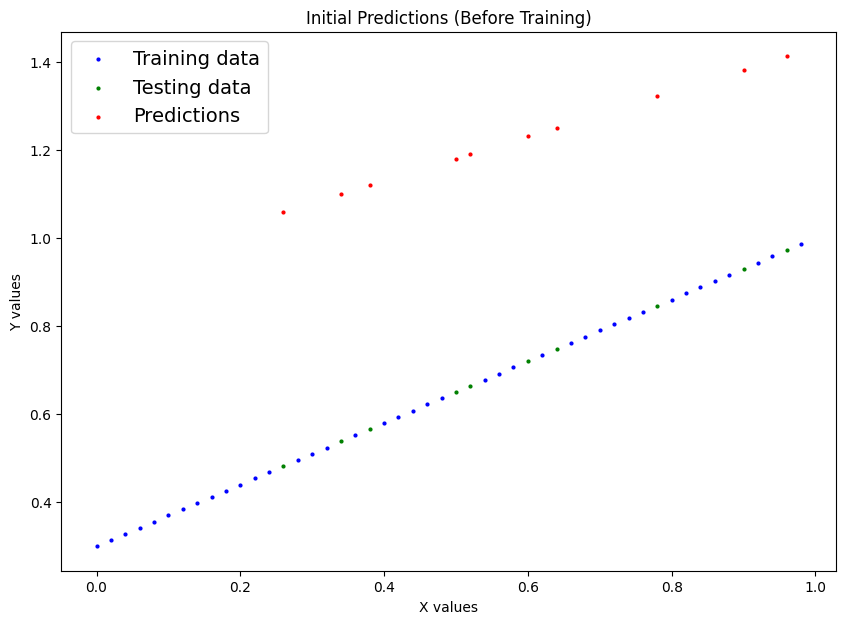

In [18]:
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    initial_preds = model_1(x_test)

def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None, title=""):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.title(title)
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.show()

plot_predictions(predictions=initial_preds, title="Initial Predictions (Before Training)")


Epoch: 0 | Loss: 0.2920 | Test Loss: 0.2555
Epoch: 10 | Loss: 0.2798 | Test Loss: 0.2428
Epoch: 20 | Loss: 0.2677 | Test Loss: 0.2300
Epoch: 30 | Loss: 0.2555 | Test Loss: 0.2173
Epoch: 40 | Loss: 0.2433 | Test Loss: 0.2045
Epoch: 50 | Loss: 0.2312 | Test Loss: 0.1918
Epoch: 60 | Loss: 0.2190 | Test Loss: 0.1791
Epoch: 70 | Loss: 0.2068 | Test Loss: 0.1663
Epoch: 80 | Loss: 0.1947 | Test Loss: 0.1536
Epoch: 90 | Loss: 0.1825 | Test Loss: 0.1409


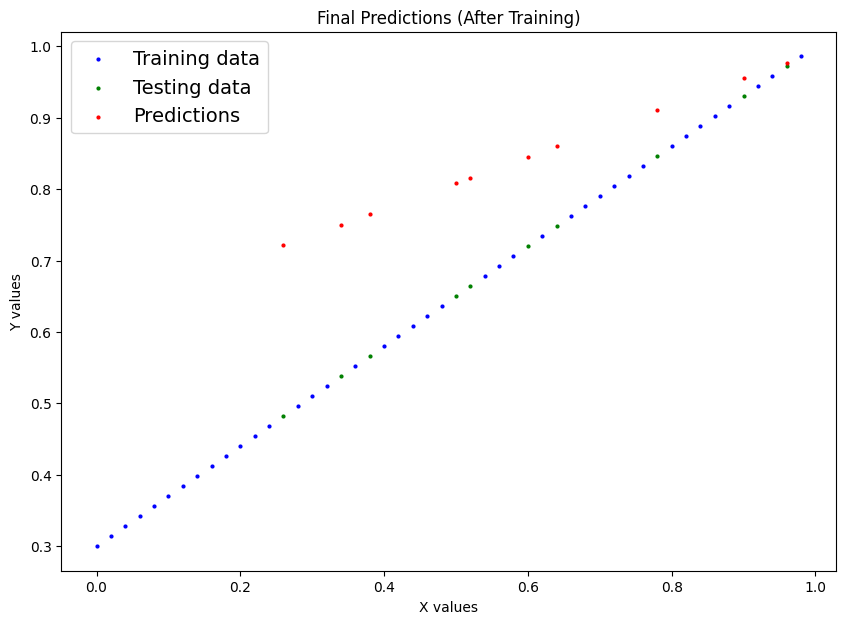

In [23]:
# the trainin loop itself
# epoch is the number ofloops

epochs = 100
for epoch in range(epochs):
  # train on
  model_1.train()

  # forward propagation
  y_pred = model_1(x_train)


  # loss
  loss = loss_fn(y_pred, y_train) # the order doesn't matter here

  # stop the tracking
  optimizer.zero_grad()

  #backward propagation
  loss.backward()

  # optimize the model
  optimizer.step()


  # Set model to evaluation mode
  model_1.eval()

  # Inference (no gradient tracking)
  with torch.inference_mode():
      test_pred = model_1(x_test)
      test_loss = loss_fn(test_pred, y_test)

  # Print results
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}")

# **7. Make and plot predictions (after training)**
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(x_test)

plot_predictions(predictions=y_preds, title="Final Predictions (After Training)")